# SOMEEvaluation

Try using SOMs as an alternative method to cluster time-series metabolomic data

Using MiniSOM as widely used (citations) and recently maintained + code easy to understand and plenty of examples

See https://github.com/JustGlowing/minisom

Import packages

In [660]:
import numpy as np
import pandas as pd

Import MiniSOM ...

In [661]:
from minisom import MiniSom

Load dataset

In [662]:
data = pd.read_csv('./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master.csv')
# Keep a copy just in case
data_copy = data 
print(data.head(5), "\n")
metabolites = data['BioCyC Name']
print(metabolites)
data.drop(data.columns[[0, 1]], axis=1, inplace=True) # Delete all metabolite names so just raw data

     BioCyC Name    Metabolite   0.5     1     2     4    12    24    48  \
0       PYRUVATE      Pyruvate  1.19  1.32  0.86  0.68  0.54  1.84  3.23   
1        LACTATE       Lactate  0.87  1.26  0.98  0.67  0.53  4.94  3.67   
2  ETHANOL-AMINE  Ethanolamine  1.31  1.45  1.18  1.22  0.52  0.59  0.31   
3       GLYCEROL      Glycerol  1.61  0.72  0.68  1.91  1.42  3.30  0.90   
4            SUC     Succinate  0.75  1.08  0.80  0.55  0.39  0.21  0.87   

      72  
0   3.63  
1  12.75  
2   0.26  
3   1.40  
4   1.62   

0             PYRUVATE
1              LACTATE
2        ETHANOL-AMINE
3             GLYCEROL
4                  SUC
5            GLYCERATE
6                  FUM
7           CADAVERINE
8                  MAL
9     4-AMINO-BUTYRATE
10                 CYS
11     2-KETOGLUTARATE
12       CIS-ACONITATE
13          PUTRESCINE
14           SHIKIMATE
15                 CIT
16                 FRU
17             GLUCOSE
18                 LYS
19                 TYR
20           GL

Data standardization

In [663]:
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
print(data)

[[ 6.71842503e-01  3.15336857e-01 -4.82794734e-01 -1.00712844e+00
  -1.11087675e+00  1.14998841e+00  3.30422643e+00  9.02926971e-01]
 [-4.61136114e-01  2.00584096e-01 -2.70330504e-01 -1.04334973e+00
  -1.15688276e+00  4.83447359e+00  3.96742452e+00  4.74872322e+00]
 [ 1.09670948e+00  5.63967841e-01  8.37765459e-02  9.48821007e-01
  -1.20288877e+00 -3.35691097e-01 -1.09699729e+00 -5.18162214e-01]
 [ 2.15887694e+00 -8.32190759e-01 -8.01491079e-01  3.44808975e+00
   2.93765186e+00  2.88526208e+00 -2.07708938e-01 -3.74376828e-02]
 [-8.86003095e-01 -1.43674189e-01 -5.89026849e-01 -1.47800516e+00
  -1.80096686e+00 -7.87337668e-01 -2.52926989e-01  5.53337180e-02]
 [ 6.01031339e-01 -6.40936157e-01 -9.78544604e-01  4.32888541e-02
   1.83350769e+00  8.64737946e-01  4.70561841e-01 -3.32619413e-01]
 [-6.38164022e-01 -4.49681554e-01 -7.30669669e-01 -9.34685871e-01
  -1.15688276e+00 -7.63566795e-01 -1.92636254e-01  3.42081684e-01]
 [ 2.11569940e-01 -2.96677872e-01 -1.10982331e-01 -2.46481435e-01
   

Initialise ...

In [757]:
# Initialization and training
som_shape = (100, 100)
#som.random_weights_init(data)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
print(data)

[[ 6.71842503e-01  3.15336857e-01 -4.82794734e-01 -1.00712844e+00
  -1.11087675e+00  1.14998841e+00  3.30422643e+00  9.02926971e-01]
 [-4.61136114e-01  2.00584096e-01 -2.70330504e-01 -1.04334973e+00
  -1.15688276e+00  4.83447359e+00  3.96742452e+00  4.74872322e+00]
 [ 1.09670948e+00  5.63967841e-01  8.37765459e-02  9.48821007e-01
  -1.20288877e+00 -3.35691097e-01 -1.09699729e+00 -5.18162214e-01]
 [ 2.15887694e+00 -8.32190759e-01 -8.01491079e-01  3.44808975e+00
   2.93765186e+00  2.88526208e+00 -2.07708938e-01 -3.74376828e-02]
 [-8.86003095e-01 -1.43674189e-01 -5.89026849e-01 -1.47800516e+00
  -1.80096686e+00 -7.87337668e-01 -2.52926989e-01  5.53337180e-02]
 [ 6.01031339e-01 -6.40936157e-01 -9.78544604e-01  4.32888541e-02
   1.83350769e+00  8.64737946e-01  4.70561841e-01 -3.32619413e-01]
 [-6.38164022e-01 -4.49681554e-01 -7.30669669e-01 -9.34685871e-01
  -1.15688276e+00 -7.63566795e-01 -1.92636254e-01  3.42081684e-01]
 [ 2.11569940e-01 -2.96677872e-01 -1.10982331e-01 -2.46481435e-01
   

Train ...

In [758]:
som.train_batch(data, 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.02101622680546313


/Users/johnpearce/Documents/MSc_Applied_Bioinformatics/Research/MSc/bioSOM/minisom.py:536: RuntimeWarning:

invalid value encountered in sqrt



Identify clusters ...

In [759]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

Plot ...

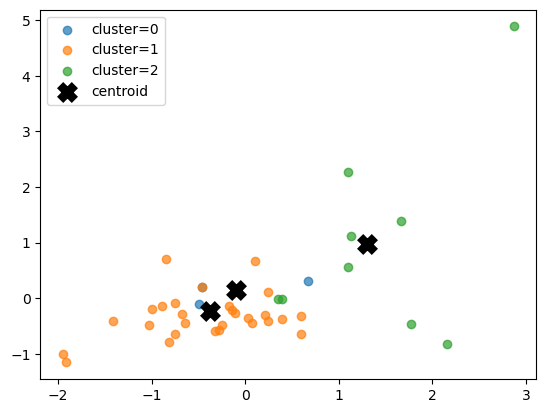

In [747]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=20, linewidths=15, color='k', label='centroid')
plt.legend();

som=(1,3) - Looks similar to K-means, PCA, etc. - Silhouette score = 0.36926102027773555

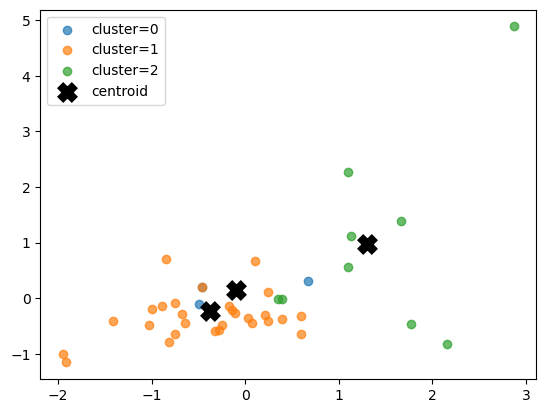

som=(1,4) - Looks similar to K-Means, PCA, etc - Silhouette score = 0.28733558395862197

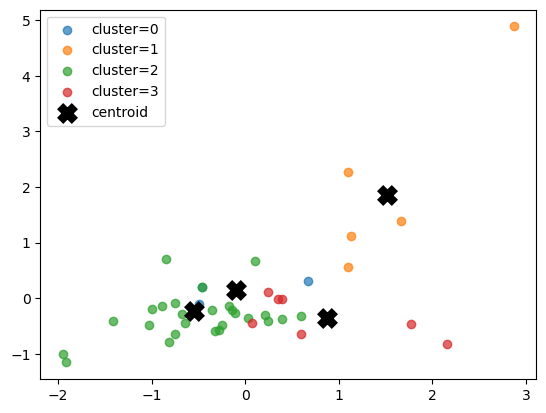

In [752]:
print(cluster_index)

[1561 1560   29    0 1599  929 1598  740 1587  981  301  969    1 1359
 1598   24 1599  718   70   30  799  718  341 1520  780 1039  787 1358
 1271 1539 1559 1559  781  780 1359   31  179   25   29  889  780]


In [753]:
print(centroid)

[[-9.89844051e-02  1.54330084e-01 -9.24501935e-02 -8.12936764e-01
  -4.47904529e-01  2.18781478e+00  3.10906915e+00  3.17191295e+00]
 [-3.77522927e-01 -2.37624314e-01 -4.15746113e-01 -3.76127199e-01
  -4.98710215e-02 -2.00450471e-01  1.64055082e-03 -5.08823563e-02]
 [ 1.29834877e+00  9.79039335e-01  9.89200051e-01  1.33308465e+00
   1.91651004e-01 -5.22953251e-01 -7.61920661e-01 -4.10297416e-01]]


Check Silhouette score

In [760]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data, cluster_index, metric='euclidean'))


0.010568120267653362


From Silhouette score som=(1,3) appears optimal

Plot a heatmap ... this should really be in DataAnalysis ...

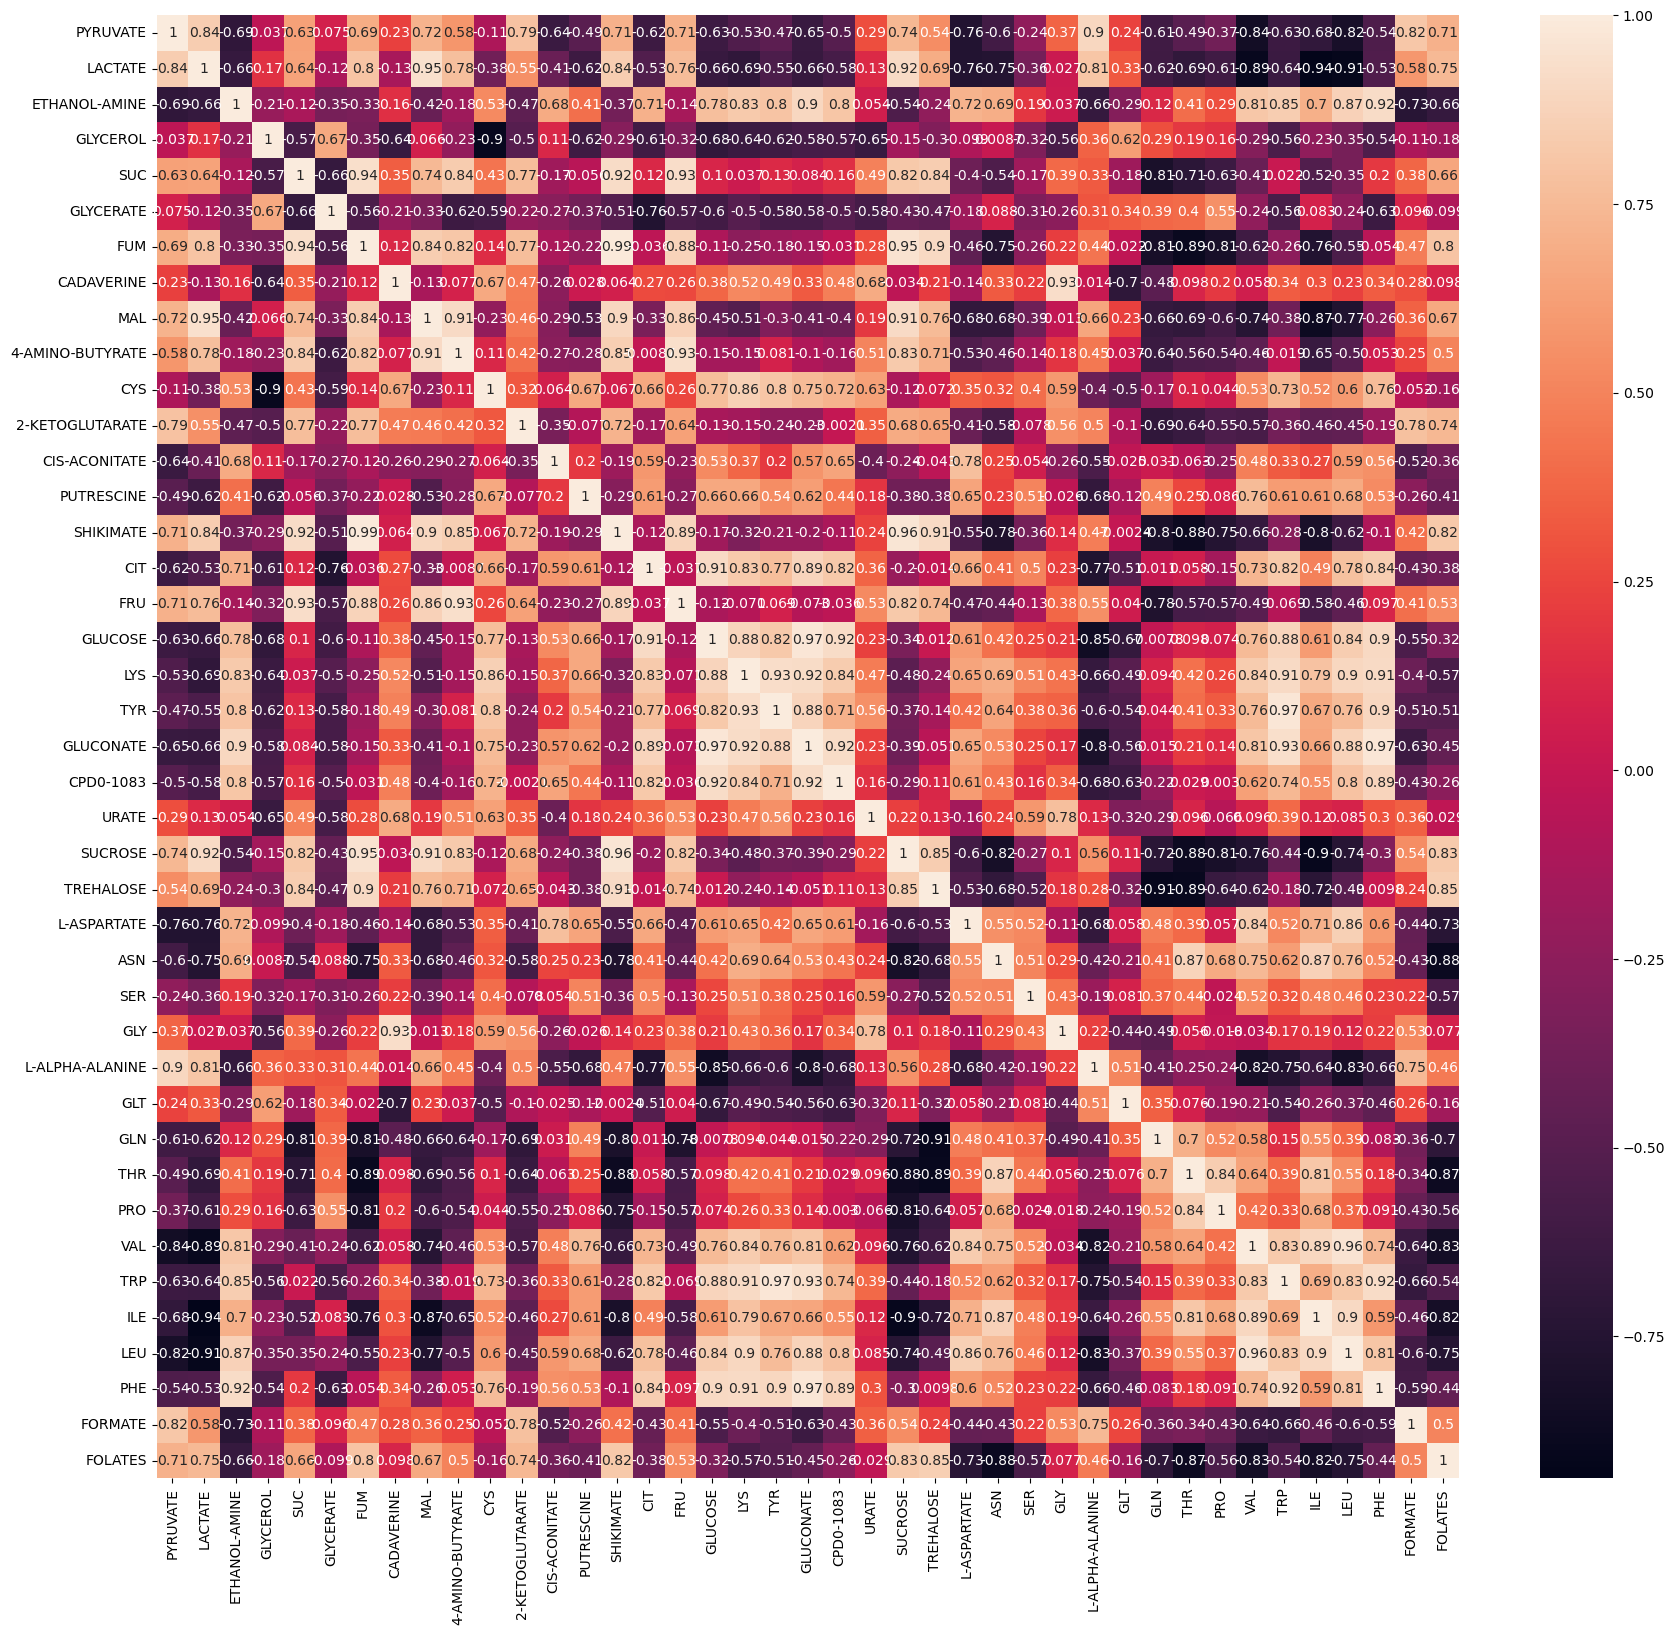

In [656]:
import seaborn as sns

# Read in transposed version of CSV file
data_and_label = pd.read_csv('./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Transposed.csv')
#print(data_and_label.head(5))
var_corr = data_and_label.corr()
#print(var_corr)
plt.figure(figsize=(21, 19))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)
plt.show()

Shows 2 interesting groups of metabolites that show roughly common 'relationships' in the form of an identifaible 'blocks'

Group 1 - GLUCOSE, LYS, TYR, GLUCONATE, CPD0-1083

Group 2 - GLN, THR, PRO, VAL, TRP, ILE, PHE

Plot SOM u-matrices ...

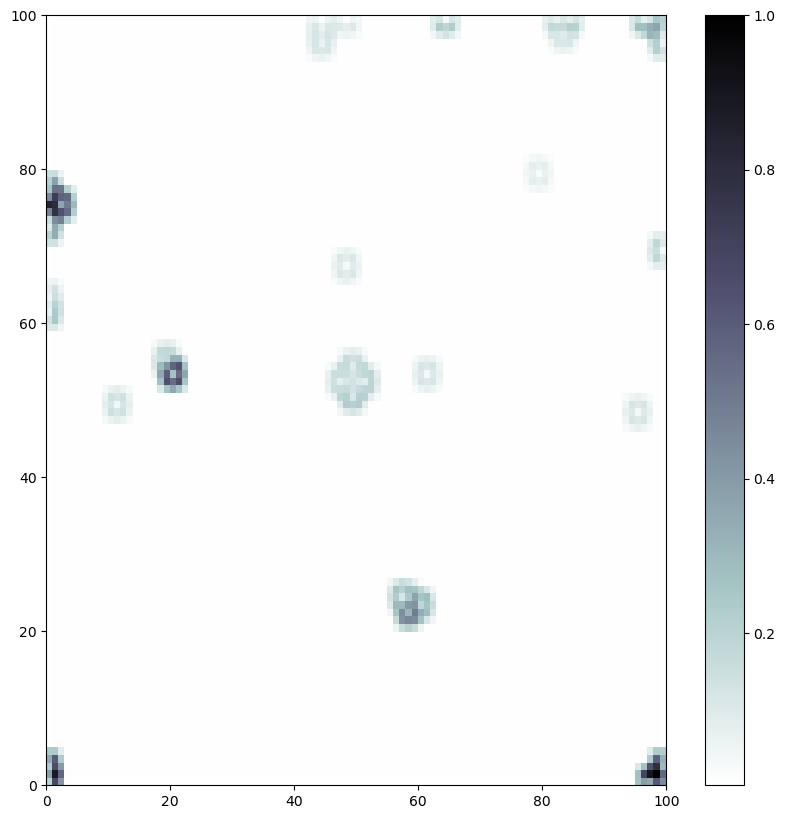

In [761]:
import matplotlib.pyplot as plt
%matplotlib inline
target = metabolites
plt.figure(figsize=(10, 10))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
#markers = ['o', 's', 'D']
#colors = ['C0', 'C1', 'C2']
#for cnt, xx in enumerate(data):
   #w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    #plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             #markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()


Some more SOMs with increasing size ...

som=(6,6 - some dark areas appearing but no clear white divide

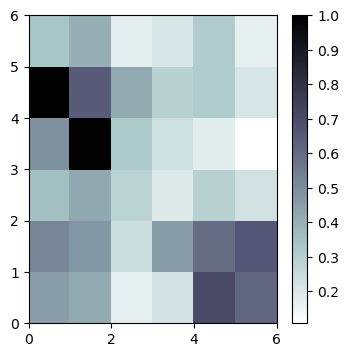

som=(12,12) - starting to look more interesting ...

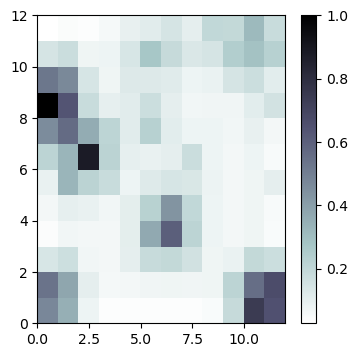

som=(24,24) - looking interesting ... not really adding anything ...

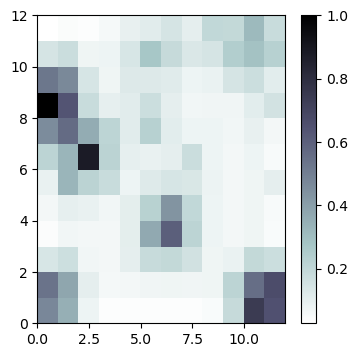

som=(48,48) ... can probably still get a bit more definition ...

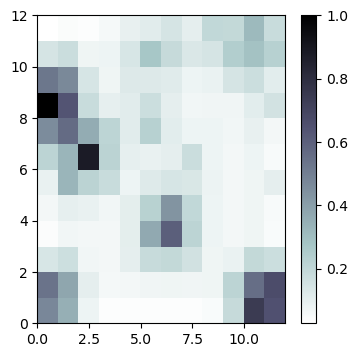

som=(96,96) ... not really ading anything ...

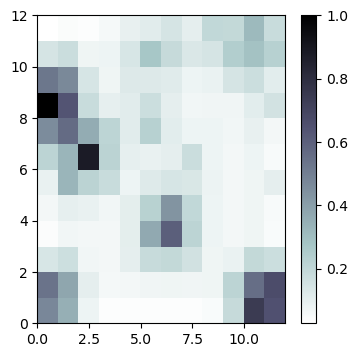

som=(192,192) appears to be too far ...

Lets try optimising SOM hyperparameters

Add this when decided on appropriate size as part of optimization ... not point doing any more iterations than necessary ...

In [ ]:
som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

Add this when decided on appropriate size ...

Plot U-matrix

TypeError: unsupported operand type(s) for -: 'str' and 'int'

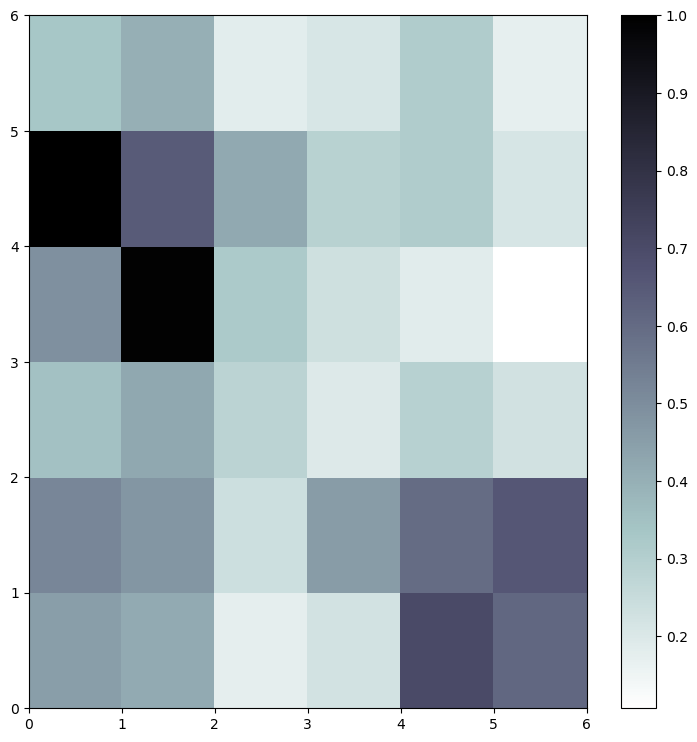

In [695]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

In [343]:
def findMin(x, y, umat):
    newxmin=max(0,x-1)
    newxmax=min(umat.shape[0],x+2)
    newymin=max(0,y-1)
    newymax=min(umat.shape[1],y+2)
    minx, miny = np.where(umat[newxmin:newxmax,newymin:newymax] == umat[newxmin:newxmax,newymin:newymax].min())
    return newxmin+minx[0], newymin+miny[0]

def findInternalNode(x, y, umat):
    minx, miny = findMin(x,y,umat)
    if (minx == x and miny == y):
        cx = minx
        cy = miny
    else:
        cx,cy = findInternalNode(minx,miny,umat)
    return cx, cy

In [344]:
import matplotlib
from matplotlib import cm
import numpy as np

def matplotlib_cmap_to_plotly(cmap, entries):
    h = 1.0/(entries-1)
    colorscale = []

    for k in range(entries):
        C = (np.array(cmap(k*h)[:3])*255)
        colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return colorscale

In [347]:
import plotly.graph_objects as go

def distributionMap(data, clusters, size, columns, minimum, maximum, plottype='barpolar'):
    spec={"type": "polar"}
    fig = make_subplots(rows=size, cols=size, specs=np.full((size,size),spec).tolist(), shared_yaxes=True, shared_xaxes=True,horizontal_spacing=0, vertical_spacing=0, subplot_titles=None, column_widths=None, row_heights=None)
    categories=columns
    if plottype=='spider':
        for index, row in data.iterrows():
            fig.add_traces(
                [go.Scatterpolargl(
                    r=row['max'],
                    name='max',
                    fillcolor='green',
                    line=dict(color='green'),
                    theta=categories,           
                    opacity=0.5),
                go.Scatterpolargl(
                    r=row['mean'],
                    name='mean',
                    fillcolor='blue',
                    line=dict(color='blue'),
                    theta=categories,           
                    opacity=0.5),
                go.Scatterpolargl(
                    r=row['min'],
                    name='min',
                    fillcolor='red',
                    line=dict(color='red'),
                    theta=categories,           
                    opacity=0.5)],
                rows=[row['row'], row['row'], row['row']],
                cols=[row['col'], row['col'], row['col']]
                )
    else:
        for index, row in data.iterrows():
            fig.add_traces(
                [
                go.Barpolar(                   
                    base=minimum,
                    r=row['max']-minimum,
                    name='max'+str(index),
                    marker_color="green",
                    theta=categories,           
                    #opacity=1
                 ),
                go.Barpolar(           
                    base=minimum,
                    r=row['mean']-minimum,
                    name='mean'+str(index),
                    marker_color="blue",
                    theta=categories,           
                    #opacity=1
                 ),
                go.Barpolar(           
                    base=minimum,
                    r=row['min']-minimum,
                    name='min'+str(index),
                    marker_color="darkred",
                    theta=categories,  
                    #opacity=1
                ) 
                ],
                rows=[row['row'], row['row'], row['row']],
                cols=[row['col'], row['col'], row['col']]
                )        

    if plottype=='spider':
        fig.update_traces(mode='lines', fill='toself')
    for layout in fig.layout:
        if layout.startswith('polar'):
            fig.layout[layout].angularaxis.visible=False
            fig.layout[layout].angularaxis.tickfont.size = 7
            fig.layout[layout].radialaxis.visible=True
            fig.layout[layout].radialaxis.tickfont.size = 7
            fig.layout[layout].barmode='overlay'
            fig.layout[layout].radialaxis.range = [minimum, maximum+1]

    for index, row in data.iterrows():
            color=row['bgcolor']
            if row['row']==0 and row['col']==0:
                # row needs to be switched because all the other plots (heatmaps) are shown with row 0 at bottom 
                fig.layout['polar'].bgcolor="rgb("+",".join(str(i) for i in [color]*3) +")"
            else:
                # row needs to be switched because all the other plots (heatmaps) are shown with row 0 at bottom 
                fig.layout['polar'+str((row['row']-1)*size+row['col'])].bgcolor="rgb("+",".join(str(i) for i in [color]*3) +")"
            
    fig.update_layout(
        width=900,
        height=900,
        showlegend=False
    )

    fig.show()

In [763]:
def plotStarburstMap(som):
    boner_rgb = []
    norm = matplotlib.colors.Normalize(vmin=0, vmax=255)
    bone_r_cmap = matplotlib.cm.get_cmap('bone_r')

    bone_r = matplotlib_cmap_to_plotly(bone_r_cmap, 255)

    layout = go.Layout(title='starburstMap')
    fig = go.Figure(layout=layout)
    fig.add_trace(go.Heatmap(z=som.distance_map().T, colorscale=bone_r))
    shapes=[]

    for row in np.arange(som.distance_map().shape[0]):
        for col in np.arange(som.distance_map().shape[1]):
            cx,cy = findInternalNode(row, col, som.distance_map().T)
            shape=go.layout.Shape(
                    type="line",
                    x0=row,
                    y0=col,
                    x1=cx,
                    y1=cy,
                    line=dict(
                        color="Black",
                        width=1
                    )
                )
            shapes=np.append(shapes, shape)

    fig.update_layout(shapes=shapes.tolist(), 
        width=500,
        height=500) 
    fig.show()
    
plotStarburstMap(som)

/var/folders/wc/qp7vtgqs2h78q8fxyh4vjjb80000gn/T/ipykernel_26792/2915079766.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



KeyboardInterrupt: 

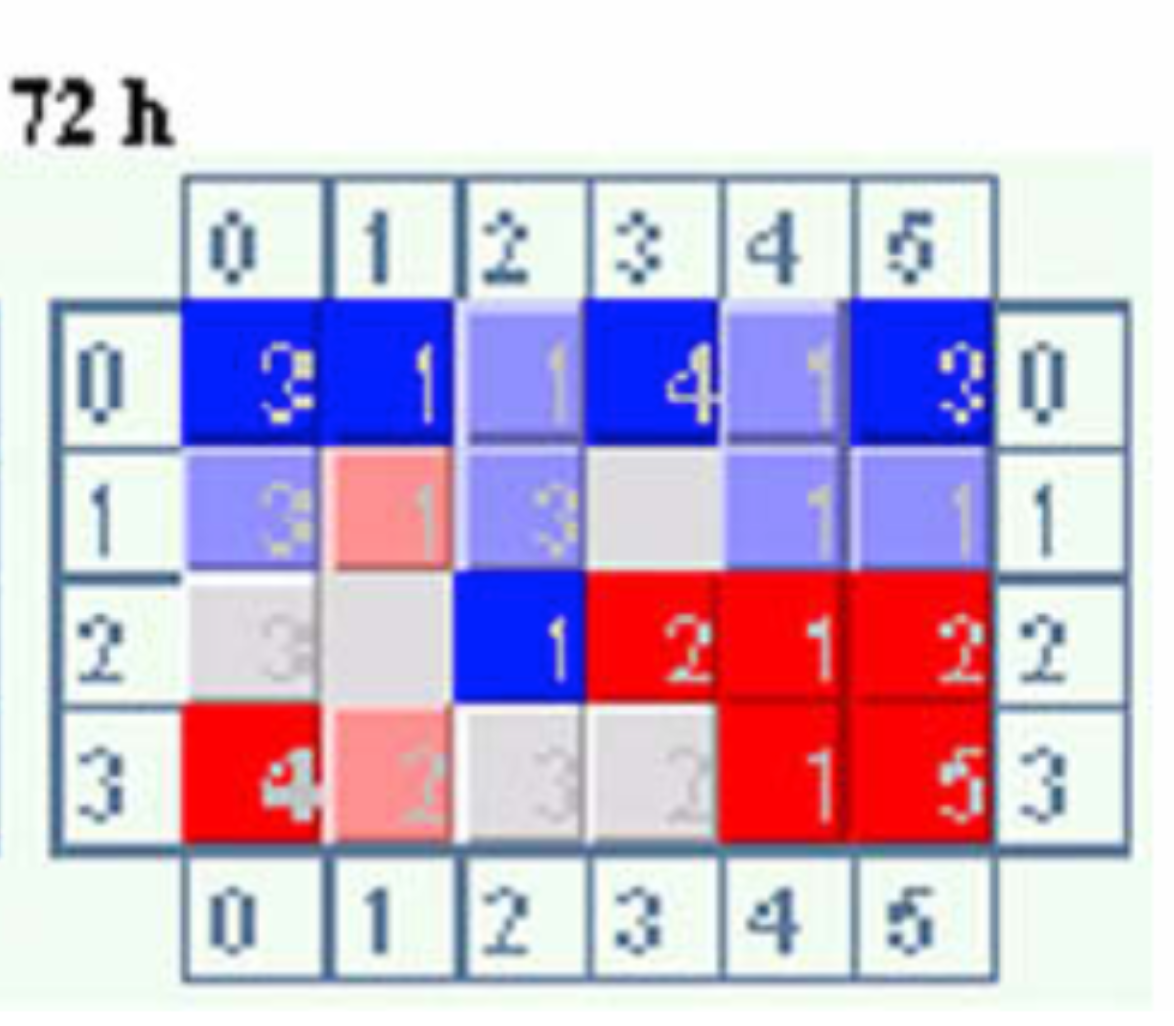

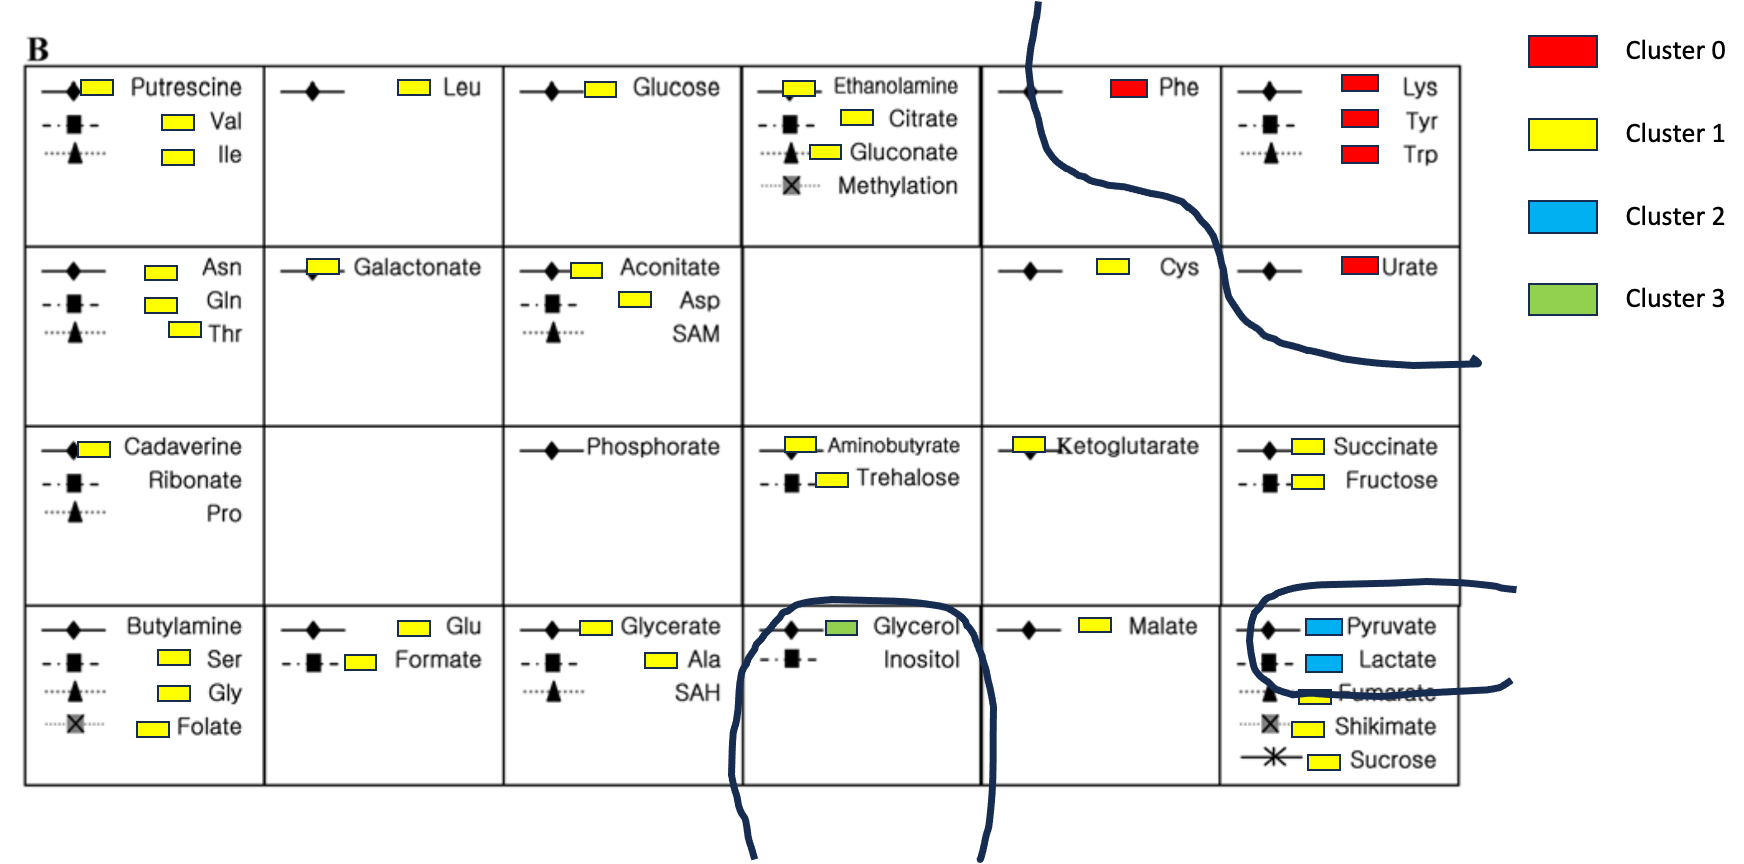

In [406]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [474]:
%autoreload 2
import pandas as pd
# data from
# https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly
sales_transaction = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data = sales_transaction[[f'Normalized {i}' for i in range(52)]].values
som = MiniSom(5, 5, data.shape[1], sigma=2., learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 50000, verbose=True)  # random training
print("\n...ready!")

FileNotFoundError: [Errno 2] No such file or directory: 'Sales_Transactions_Dataset_Weekly.csv'

In [543]:
print(som.labels_map(data, metabolites))


defaultdict(<class 'list'>, {(196, 12): Counter({'PYRUVATE': 1}), (199, 0): Counter({'LACTATE': 1}), (12, 139): Counter({'ETHANOL-AMINE': 1}), (0, 0): Counter({'GLYCEROL': 1}), (197, 188): Counter({'SUC': 1}), (13, 0): Counter({'GLYCERATE': 1}), (194, 177): Counter({'FUM': 1}), (100, 91): Counter({'CADAVERINE': 1}), (195, 136): Counter({'MAL': 1}), (120, 103): Counter({'4-AMINO-BUTYRATE': 1}), (30, 111): Counter({'CYS': 1}), (129, 45): Counter({'2-KETOGLUTARATE': 1}), (0, 12): Counter({'CIS-ACONITATE': 1}), (166, 199): Counter({'PUTRESCINE': 1}), (185, 186): Counter({'SHIKIMATE': 1}), (0, 114): Counter({'CIT': 1}), (199, 199): Counter({'FRU': 1}), (83, 197): Counter({'GLUCOSE': 1}), (0, 138): Counter({'LYS': 1}), (0, 150): Counter({'TYR': 1}), (97, 196): Counter({'GLUCONATE': 1}), (88, 184): Counter({'CPD0-1083': 1}), (39, 101): Counter({'URATE': 1}), (185, 3): Counter({'SUCROSE': 1}), (87, 96): Counter({'TREHALOSE': 1}), (151, 197): Counter({'L-ASPARTATE': 1}), (93, 133): Counter({'AS

In [764]:
data = pd.read_csv('./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master.csv')
# Keep a copy
#data_copy = data 
print(data.head(5))
metabolites = data['BioCyC Name']
print(metabolites)
data.drop(data.columns[[0, 1]], axis=1, inplace=True) # Delete all metabolite names so just raw data
print(data)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
print(data)

     BioCyC Name    Metabolite   0.5     1     2     4    12    24    48  \
0       PYRUVATE      Pyruvate  1.19  1.32  0.86  0.68  0.54  1.84  3.23   
1        LACTATE       Lactate  0.87  1.26  0.98  0.67  0.53  4.94  3.67   
2  ETHANOL-AMINE  Ethanolamine  1.31  1.45  1.18  1.22  0.52  0.59  0.31   
3       GLYCEROL      Glycerol  1.61  0.72  0.68  1.91  1.42  3.30  0.90   
4            SUC     Succinate  0.75  1.08  0.80  0.55  0.39  0.21  0.87   

      72  
0   3.63  
1  12.75  
2   0.26  
3   1.40  
4   1.62  
0             PYRUVATE
1              LACTATE
2        ETHANOL-AMINE
3             GLYCEROL
4                  SUC
5            GLYCERATE
6                  FUM
7           CADAVERINE
8                  MAL
9     4-AMINO-BUTYRATE
10                 CYS
11     2-KETOGLUTARATE
12       CIS-ACONITATE
13          PUTRESCINE
14           SHIKIMATE
15                 CIT
16                 FRU
17             GLUCOSE
18                 LYS
19                 TYR
20           GLUC

In [791]:
som = MiniSom(150, 150, data.shape[1], sigma=2., learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 10000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 9.041124963807513e-10

...ready!


/Users/johnpearce/Documents/MSc_Applied_Bioinformatics/Research/MSc/bioSOM/minisom.py:536: RuntimeWarning:

invalid value encountered in sqrt



ValueError: 'grey_r' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

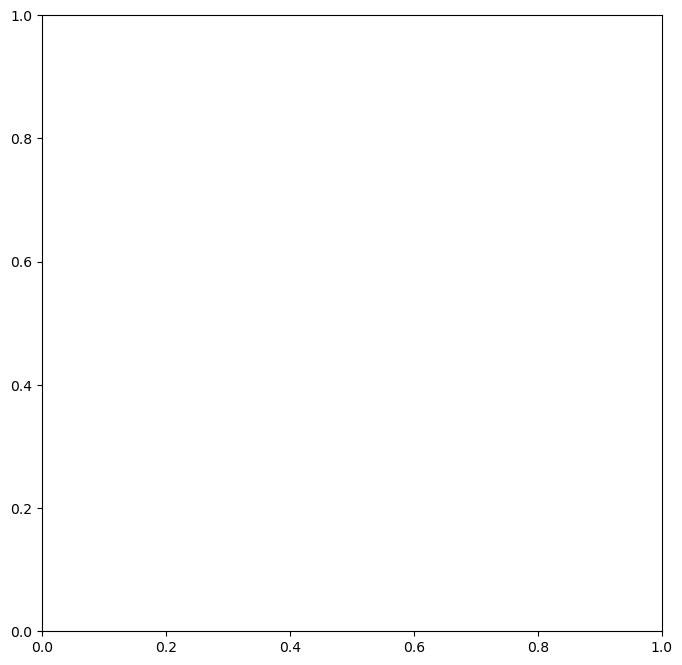

In [792]:
win_map = som.win_map(data)
#print(len(win_map))
#print(win_map)
#print(type(win_map))
#print(len(win_map[0]))
#print(len(win_map[1]))
plt.figure(figsize=(8, 8))
the_grid = GridSpec(19, 19)
plt.pcolor(som.distance_map().T, cmap='grey_r', alpha=0.2)
for position in win_map.keys():
    plt.subplot(the_grid[6-position[1], position[0]])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
#plt.savefig('resulting_images/time_series.png')
plt.show()

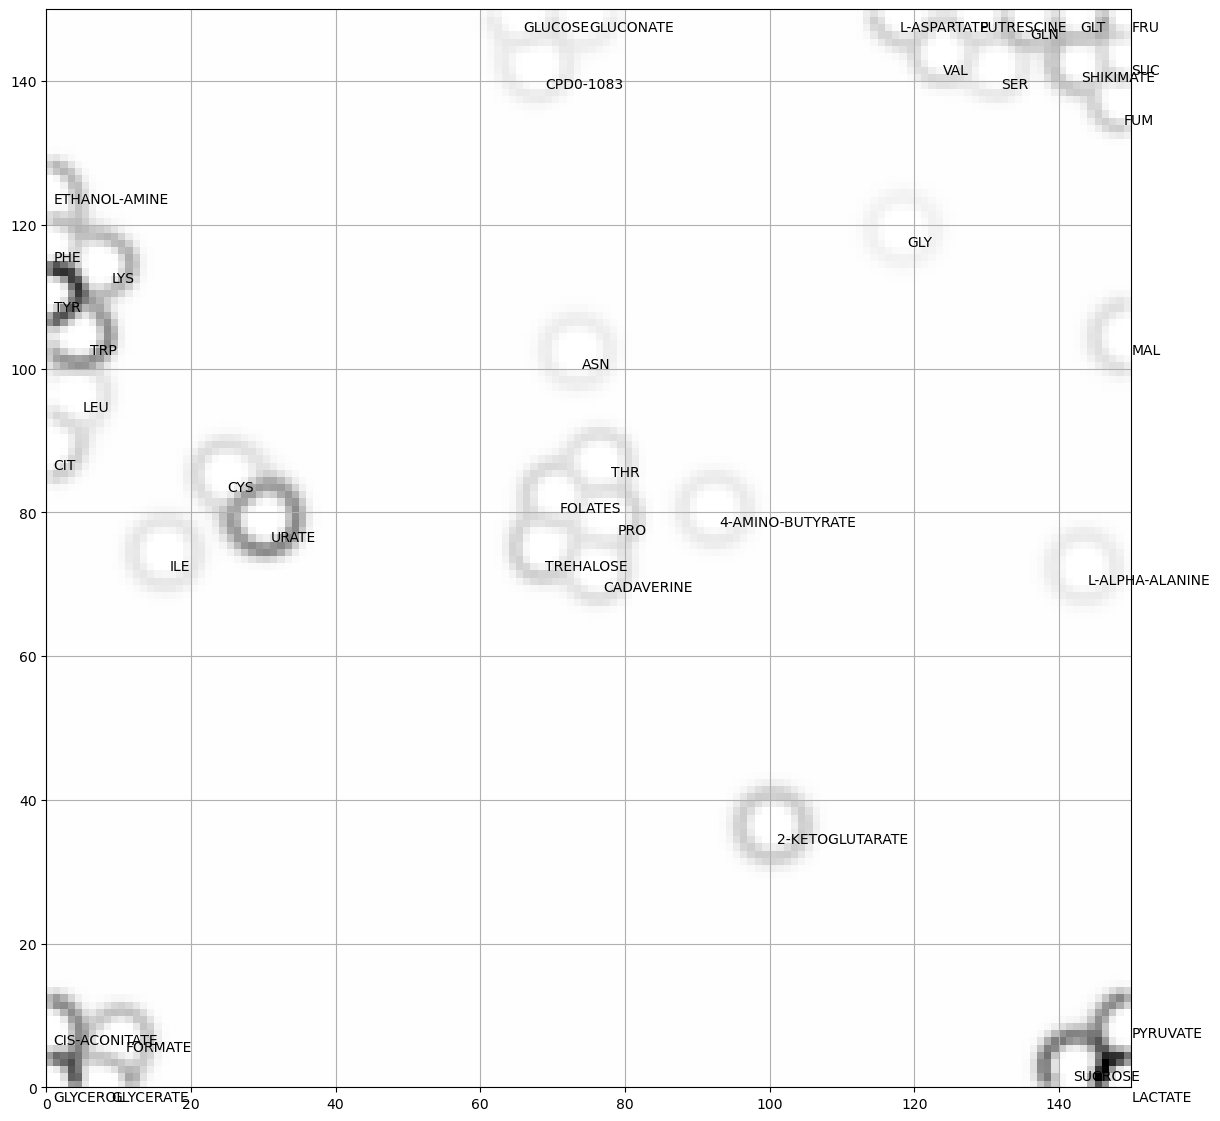

In [797]:
metabolite_map = som.labels_map(data, metabolites)

size=5

plt.figure(figsize=(14, 14))
for p, countries in metabolite_map.items():
    countries = list(countries)
    x = p[0] + 1
    y = p[1] - 1
    for i, c in enumerate(countries):
        #off_set = (i+1)/len(countries)
        off_set=1
        plt.text(x, y-off_set, c, fontsize=10)
plt.pcolor(som.distance_map().T, cmap='binary', alpha=1)
#plt.xticks(np.arange(size+1))
#plt.yticks(np.arange(size+1))
plt.grid()

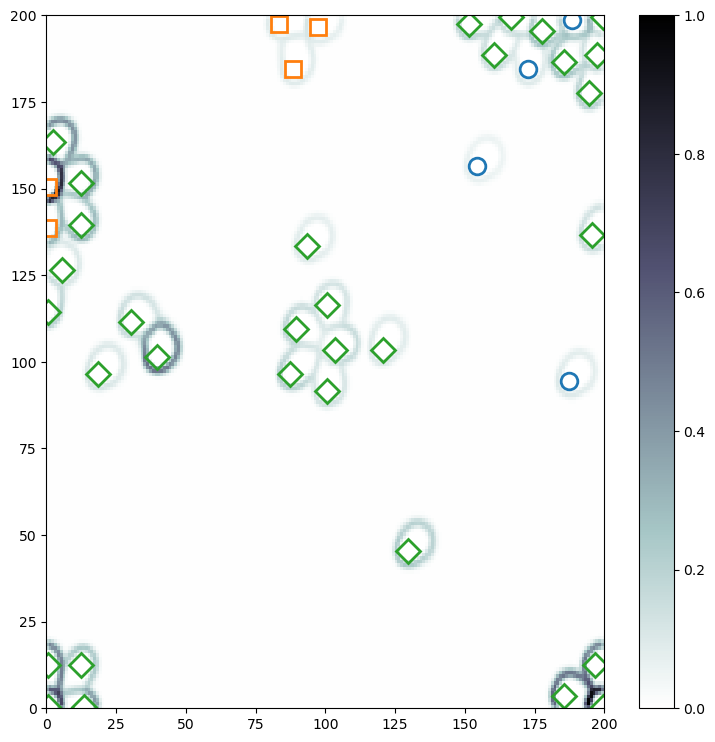

In [541]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

ARCHIVE

In [ ]:
group_zero = ['PUTRESCINE', 'VAL', 'ILE', 'GLN', 'THR', 'PRO', 'TRP']
group_one = ['SER', 'GLY', 'GLT', 'L-ALPHA-ALANINE']
group_two = ['CPD0-1083', 'GLUCOSE', 'GLUCONATE', 'LYS', 'TYR']
group_three = ['LEU', 'ETHANOL-AMINE', 'CIT', 'PHE', 'ASN', 'CIS-ACONITATE', 'L-ASPARTATE', 'CYS', 'URATE', \
              'CADAVERINE', '4-AMINO-BUTYRATE', 'TREHALOSE', '2-KETOGLUTARATE', 'SUC', 'FRU', 'FOLATES', 'FORMATE', \
               'GLYCERATE', 'GLYCEROL', 'MAL', 'PYRUVATE', 'LACTATE', 'FUM', 'SHIKIMATE', 'SUCROSE']

clusters = []

for metab in (range(0, len(metabolites))):
    if metabolites[metab] in group_zero:
        clusters.append(0)
    if metabolites[metab] in group_one:
        clusters.append(1)
    if metabolites[metab] in group_two:
        clusters.append(2)
    if metabolites[metab] in group_three:
        clusters.append(3)

print(clusters)
print(len(clusters))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [4] # Set number of clusters identified manually
silhouette_avg_n_clusters = []

scaler = StandardScaler()
sil_data = data.to_numpy()
sil_data_scaled = scaler.fit_transform(data)

print(silhouette_score(sil_data_scaled, clusters, metric='euclidean'))